In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from fractions import Fraction

# ***Hubs and Authorities***
----------------------

In [2]:
# This is another way to find central nodes in a network.
# This method was also developed for search engines to crawl pages, about a query, looking through the hyperlinked structure of the web.

In [3]:
# Given a query to a search engine,
# the first setp is to find web pages that contain the query string (in the body of the response html/json/ you name it)
# or pages that the engine thinks where it can find relevant information.

# these are potential authorities.
# This is called the Root -> a set of web pages

In [4]:
# The next step is to find all the web pages that link to any page in the Root set.
# these are not themselves necesarily relevant to the user's query
# they could instead be lonking two pages that relevant (this is where their relevancy in our query comes from, which is not intrisnic)

# This whole set of nodes are called Base

In [5]:
# In comparison to Page rank, here our interest is centred around a small subset of the whole network instead of the entire network
# compared to Page ranks.


## ***HITS algorithm***
--------------------

In [6]:
# HITS algorithm work imilar to Page rank, by computing a score in k iterations, while keeping track of the score from the preious iteration for 
# reference
# The difference is that HITS will keep track of two kinds of scores for every node -> authority score & hub score
# Firstly initialize evry node with a authority score 1 and a hub score 1.

# Then iteratiely update the scores as,

In [7]:
# Authority update rule
# authority score -> sum of the hub scores of all nodes that points to the said node

In [8]:
# Hub update rule
# sum of authority scores of all nodes that it points to

In [9]:
# Normalization of authority and hub scores
# Authority score(n) = auth(n) / sum of auth(n) where n is an element of N

# Repeat this k time

# ***Normalized authority score(n) = $\frac{auth(n)}{\sum_{n \in N}(auth(n))}$***
# ***Normalized hub score(n) = $\frac{hub(n)}{\sum_{n \in N}(hub(n))}$***

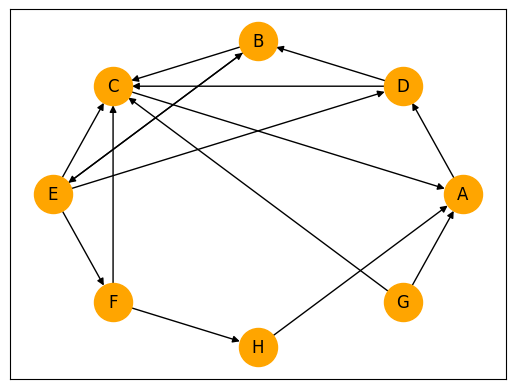

In [10]:
graph = nx.MultiDiGraph()
graph.add_edges_from([("A", "D"), ("B", "C"), ("B", "E"), ("C", "A"), ("D", "B"), ("D", "C"), ("E", "B"), ("E", "C"), ("E", "D"), ("E", "F"), 
                     ("F", "C"), ("F", "H"), ("G", "A"), ("G", "C"), ("H", "A")])
pos = nx.circular_layout(graph)

nx.draw_networkx(graph, node_size = 750, node_color = "orange", pos = pos)

In [11]:
# after the first step all nodes will have an authority scre of 1 and a hub score of 1

# AUTHORITY SCORES

# A
# A points to D only in this network
# sum of authority scores
# update A's authority score = sum of hub scores of C, G & H
# since these are 1 each, A's authority score will become 3

# B
# D & E point to node B
# authority score of node B is 2

# C
# B, D, E & F point to node C
# authority score(C) = 5

# At the first itearation (only at the first iteration) the new authority scores are simply the in-degrees of the given node
# This is because all nodes have been initialized with a hub score of 1 previously.
# This will not be the case once the new scores have been updated (in the subsequent iterations).

In [12]:
# HUB SCORES

# A
# A points to only D
# D has an authority score 1
# so, D's hub score becomes 1

# B
# B points to C and E
# hub score(B) = 2

# Essentially the newly updated hub scores are just the out-degrees of the nodes (only in the first iteration)

# NORMALIZATION
# Normalized hub score = hub(Node) / sum of hub(Node) 
# = hub(Node) / 15 since all had an initial authority score of 1

# Normalized authority score = auth(Node) / sum of auth(Node)
# = auth(Node) / 15

In [13]:
{node: graph.in_degree(node) for node in graph.nodes()}

{'A': 3, 'D': 2, 'B': 2, 'C': 5, 'E': 1, 'F': 1, 'H': 1, 'G': 0}

In [14]:
# Normalized authority scores after 1st iteration
# where we get the sum of hub scores of nodes points to it

auth_1 = {node: Fraction(graph.in_degree(node), 15) for node in graph.nodes()}
auth_1

{'A': Fraction(1, 5),
 'D': Fraction(2, 15),
 'B': Fraction(2, 15),
 'C': Fraction(1, 3),
 'E': Fraction(1, 15),
 'F': Fraction(1, 15),
 'H': Fraction(1, 15),
 'G': Fraction(0, 1)}

In [15]:
{node: graph.out_degree(node) for node in graph.nodes()}

{'A': 1, 'D': 2, 'B': 2, 'C': 1, 'E': 4, 'F': 2, 'H': 1, 'G': 2}

In [16]:
# Normalized hub scores after 1st iteration
# sum of authority scores of nodes that the said node points to

hub_1 = {node: Fraction(graph.out_degree(node), 15) for node in graph.nodes()}
hub_1

{'A': Fraction(1, 15),
 'D': Fraction(2, 15),
 'B': Fraction(2, 15),
 'C': Fraction(1, 15),
 'E': Fraction(4, 15),
 'F': Fraction(2, 15),
 'H': Fraction(1, 15),
 'G': Fraction(2, 15)}

In [17]:
# Second iteration
# Here we need to pay atention to the hub and authority scores of individual nodes unlike in the first iteration

In [18]:
# consider A
# Authority score
# Incoming nodes -> C, G & H
# = hub(C) + hub(G) + hub(H)

hub_1.get("C") + hub_1.get("G") + hub_1.get("H")

Fraction(4, 15)

In [19]:
# Hub score
# Outgoig nodes -> D only
# = auth(D)

auth_1.get("D")

Fraction(2, 15)

In [22]:
# now for B
# authority score
# incoming nodes -> E & D
# hub(E) + hub(D)

hub_1.get("E") + hub_1.get("D")

Fraction(2, 5)

In [23]:
# hub score
# outgoing nodes -> C & E
# auth(C) + auth(E)

auth_1.get("C") + auth_1.get("E")

Fraction(2, 5)

In [24]:
# Once you have the authority and hub scores from the second iteration,
# they need to be normalized

# all auhority scores in 2nd iteration add up to 35/15
# to normalize authority scores, divide indvidual authority scores by (35/15)

# all hub scores in 2nd iteration add up to 45/15
# to normalize hub scores, divide indvidual hub scores by 3

In [25]:
# What happens as k increases?
# Will the scores converge and become constant?

# For some nodes scores may become stable
# but for others it will fluctuate for a quite a long time, but eventually will converge and become static

In [28]:
# Returns hubs, authorities

nx.hits(graph, max_iter = 1_000_000)

({'A': 0.04305010876408988,
  'D': 0.1874910015340169,
  'B': 0.144440892769927,
  'C': 0.029508489450125148,
  'E': 0.2676258004059808,
  'F': 0.14444089276992703,
  'H': 0.029508489450125148,
  'G': 0.15393432485580824},
 {'A': 0.08751958702900839,
  'D': 0.1276828401181024,
  'B': 0.18704574169397803,
  'C': 0.3690360954887364,
  'E': 0.0593629015758755,
  'F': 0.1099899325184238,
  'H': 0.05936290157587561,
  'G': -1.457656674600961e-17})